<a href="https://colab.research.google.com/github/lijds/ml2/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train = pd.read_csv('application_train.csv')
print('Training data shape: ', train.shape)
train.sample(10)

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
158624,283898,0,Cash loans,F,N,Y,1,112500.0,355536.0,18283.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
113035,231101,0,Cash loans,F,N,N,0,112500.0,481495.5,33642.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
302230,450152,0,Cash loans,M,Y,N,1,225000.0,473760.0,51151.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
98824,214749,0,Cash loans,F,N,Y,1,90000.0,351000.0,17068.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
48031,155630,0,Cash loans,M,N,N,0,157500.0,136260.0,9234.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
217561,352083,0,Cash loans,F,Y,Y,1,157500.0,691020.0,22419.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
8838,110275,0,Cash loans,F,N,N,0,135000.0,247500.0,10615.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
270673,413762,1,Cash loans,F,N,Y,0,135000.0,545040.0,43191.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
296441,443446,0,Cash loans,F,N,Y,0,121500.0,900000.0,29164.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
216168,350469,0,Cash loans,M,Y,Y,0,168750.0,149256.0,15421.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
test = pd.read_csv('application_test.csv')
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [5]:
train['TARGET'].value_counts()


,count
TARGET,
0,282686
1,24825


In [6]:
cat_cols = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'
]

binary_cols = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'
] + [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]

In [7]:
for col in cat_cols:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
for col in binary_cols:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [8]:
cat_cols = train.select_dtypes(include=['category']).columns
num_cols = [col for col in train.select_dtypes(include=[np.number]).columns if col != 'TARGET']

In [9]:
train.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,category
CODE_GENDER,category
FLAG_OWN_CAR,category
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [10]:
missing = train.isnull().mean().sort_values(ascending=False)
missing.head(50)

,0
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
COMMONAREA_MEDI,0.698723
NONLIVINGAPARTMENTS_MEDI,0.694330
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330
FONDKAPREMONT_MODE,0.683862
LIVINGAPARTMENTS_AVG,0.683550
LIVINGAPARTMENTS_MEDI,0.683550
LIVINGAPARTMENTS_MODE,0.683550


In [11]:
cols_to_drop = [
    'COMMONAREA_AVG','COMMONAREA_MODE','COMMONAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG',
    'FONDKAPREMONT_MODE',
    'LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE',
    'FLOORSMIN_MODE','FLOORSMIN_AVG','FLOORSMIN_MEDI',
    'YEARS_BUILD_AVG','YEARS_BUILD_MODE','YEARS_BUILD_MEDI',
    'OWN_CAR_AGE',
    'LANDAREA_MEDI','LANDAREA_AVG','LANDAREA_MODE',
    'BASEMENTAREA_MODE','BASEMENTAREA_MEDI','BASEMENTAREA_AVG',
    'NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI',
    'ELEVATORS_AVG','ELEVATORS_MEDI','ELEVATORS_MODE',
    'WALLSMATERIAL_MODE',
    'APARTMENTS_AVG','APARTMENTS_MEDI','APARTMENTS_MODE',
    'LIVINGAREA_MODE','LIVINGAREA_MEDI','LIVINGAREA_AVG'
]

train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [12]:
train.isnull().mean().sort_values(ascending=False).head(10)

,0
EXT_SOURCE_1,0.563811
ENTRANCES_MODE,0.503488
ENTRANCES_MEDI,0.503488
ENTRANCES_AVG,0.503488
HOUSETYPE_MODE,0.501761
FLOORSMAX_MEDI,0.497608
FLOORSMAX_AVG,0.497608
FLOORSMAX_MODE,0.497608
YEARS_BEGINEXPLUATATION_MEDI,0.487810
YEARS_BEGINEXPLUATATION_MODE,0.487810


In [13]:
num_cols = [col for col in train.select_dtypes(include=[np.number]).columns if col != 'TARGET']

for col in num_cols:
    median = train[col].median()
    train[col] = train[col].fillna(median)
    test[col] = test[col].fillna(median)


In [14]:
train.isnull().mean().sort_values(ascending=False).head(10)

,0
HOUSETYPE_MODE,0.501761
EMERGENCYSTATE_MODE,0.473983
OCCUPATION_TYPE,0.313455
NAME_TYPE_SUITE,0.004201
NAME_CONTRACT_TYPE,0.000000
SK_ID_CURR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_CREDIT,0.000000
AMT_INCOME_TOTAL,0.000000


In [15]:
train.drop(['HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE'], axis=1, inplace=True)
test.drop(['HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE'], axis=1, inplace=True)

In [16]:
cat_cols = train.select_dtypes(include=['category']).columns

for col in cat_cols:
    if 'Unknown' not in train[col].cat.categories:
        train[col] = train[col].cat.add_categories(['Unknown'])
    train[col] = train[col].fillna('Unknown')

    if 'Unknown' not in test[col].cat.categories:
        test[col] = test[col].cat.add_categories(['Unknown'])
    test[col] = test[col].fillna('Unknown')

In [17]:
train.isnull().mean().sort_values(ascending=False).head(10)

,0
SK_ID_CURR,0.0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
FLAG_OWN_REALTY,0.0
CNT_CHILDREN,0.0
AMT_INCOME_TOTAL,0.0
AMT_CREDIT,0.0
AMT_ANNUITY,0.0


In [18]:
train[train.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [19]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,...,0.142944,1.400626,0.099717,-962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,...,0.446033,2.377224,0.361735,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [20]:
for col in cat_cols:
    print(f"{col}: {train[col].nunique()} унікальних значень")

NAME_CONTRACT_TYPE: 2 унікальних значень
CODE_GENDER: 3 унікальних значень
FLAG_OWN_CAR: 2 унікальних значень
FLAG_OWN_REALTY: 2 унікальних значень
NAME_TYPE_SUITE: 8 унікальних значень
NAME_INCOME_TYPE: 8 унікальних значень
NAME_EDUCATION_TYPE: 5 унікальних значень
NAME_FAMILY_STATUS: 6 унікальних значень
NAME_HOUSING_TYPE: 6 унікальних значень
FLAG_MOBIL: 2 унікальних значень
FLAG_EMP_PHONE: 2 унікальних значень
FLAG_WORK_PHONE: 2 унікальних значень
FLAG_CONT_MOBILE: 2 унікальних значень
FLAG_PHONE: 2 унікальних значень
FLAG_EMAIL: 2 унікальних значень
OCCUPATION_TYPE: 19 унікальних значень
REGION_RATING_CLIENT: 3 унікальних значень
REGION_RATING_CLIENT_W_CITY: 3 унікальних значень
WEEKDAY_APPR_PROCESS_START: 7 унікальних значень
REG_REGION_NOT_LIVE_REGION: 2 унікальних значень
REG_REGION_NOT_WORK_REGION: 2 унікальних значень
LIVE_REGION_NOT_WORK_REGION: 2 унікальних значень
REG_CITY_NOT_LIVE_CITY: 2 унікальних значень
REG_CITY_NOT_WORK_CITY: 2 унікальних значень
LIVE_CITY_NOT_WORK_C

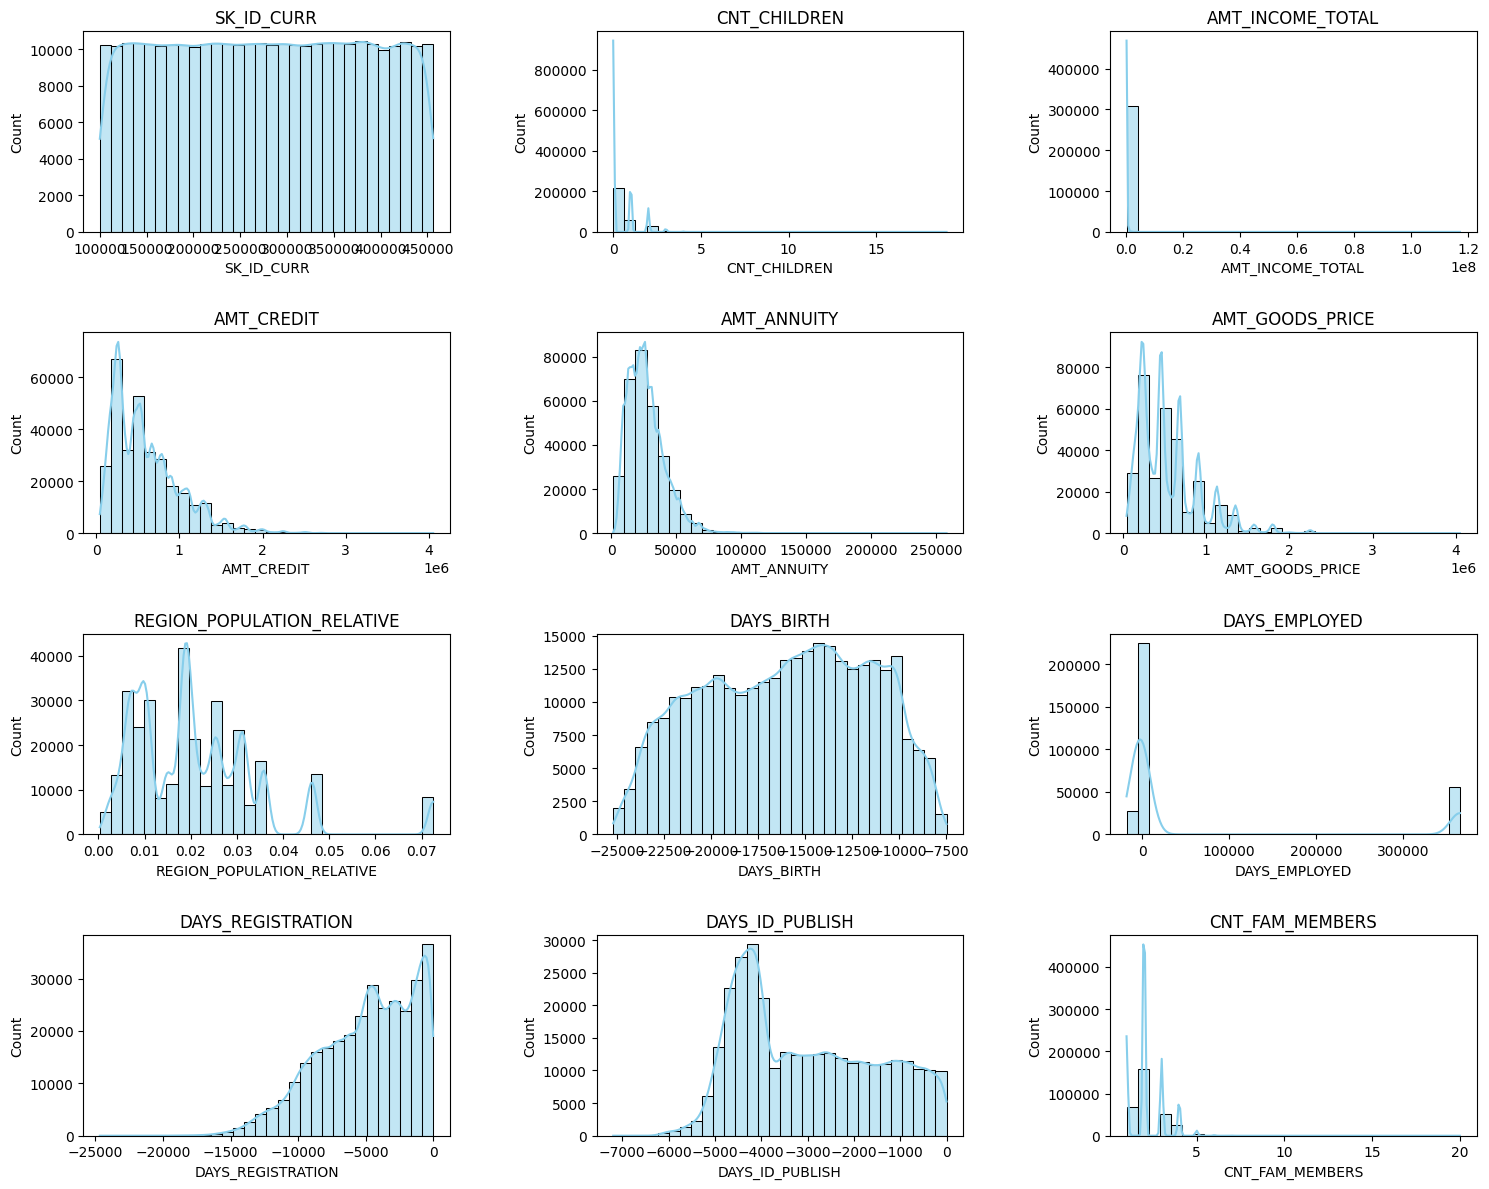

In [21]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols[:12]):
    sns.histplot(train[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

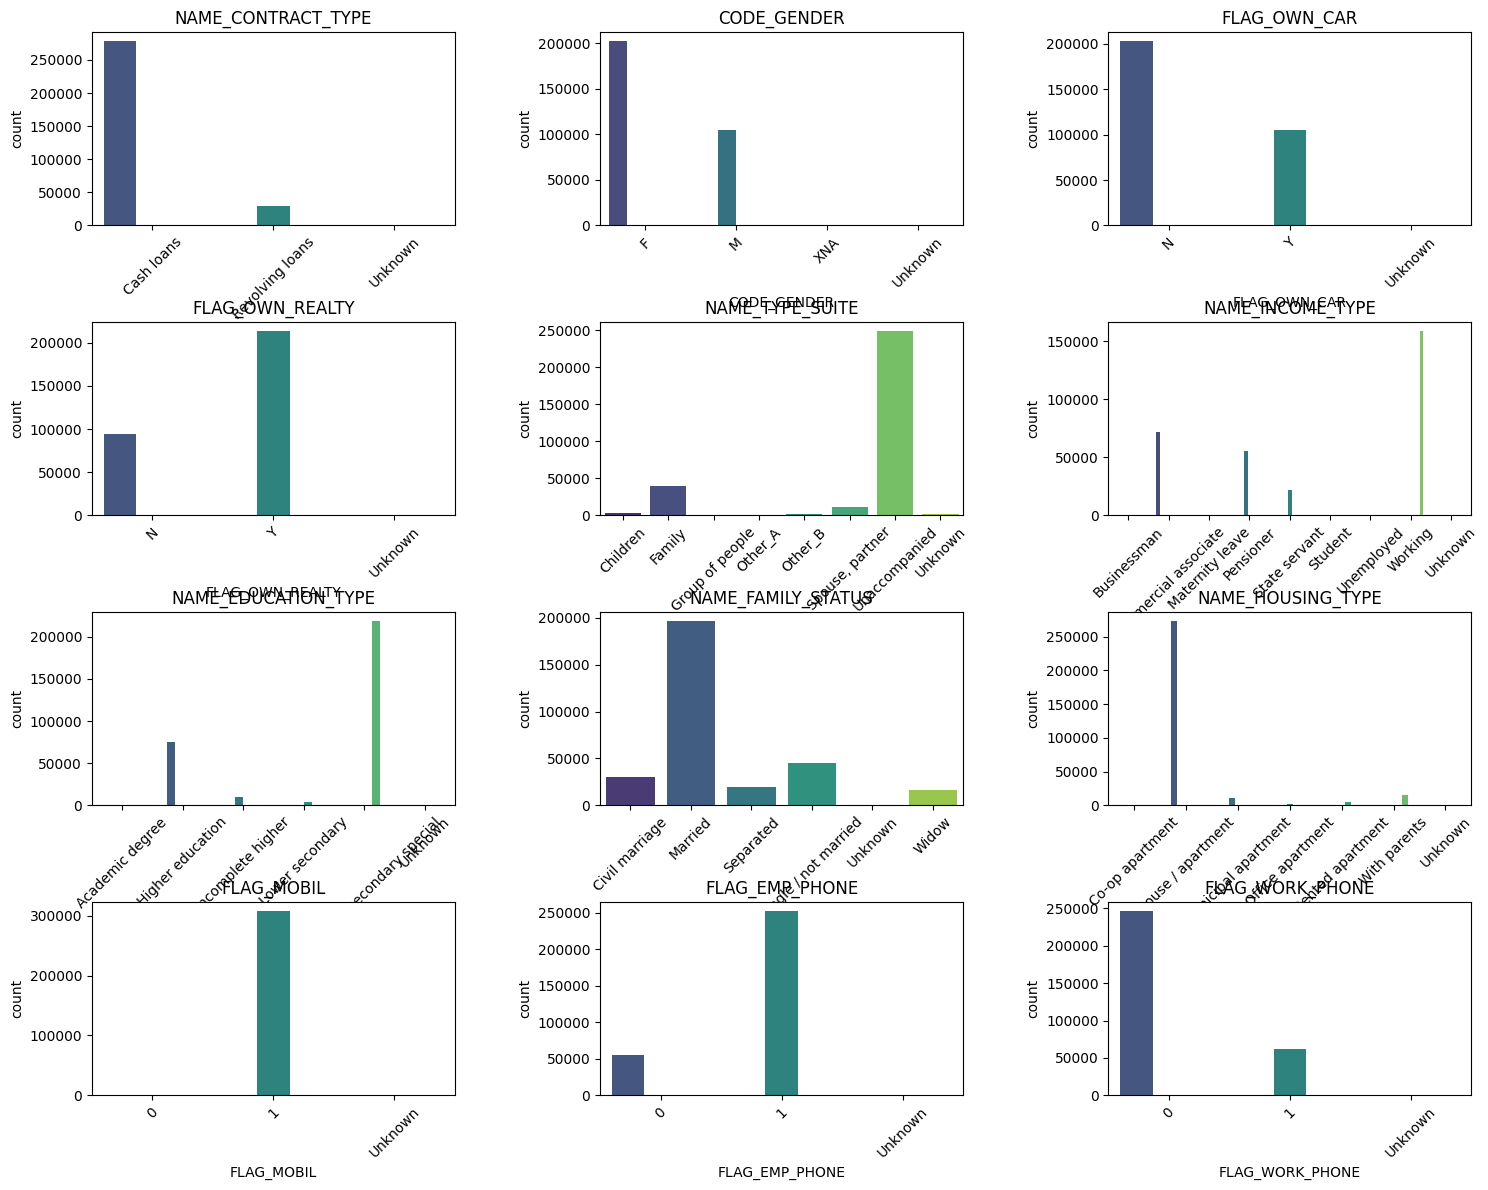

In [22]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols[:12]):
    sns.countplot(x=train[col], hue=train[col], ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

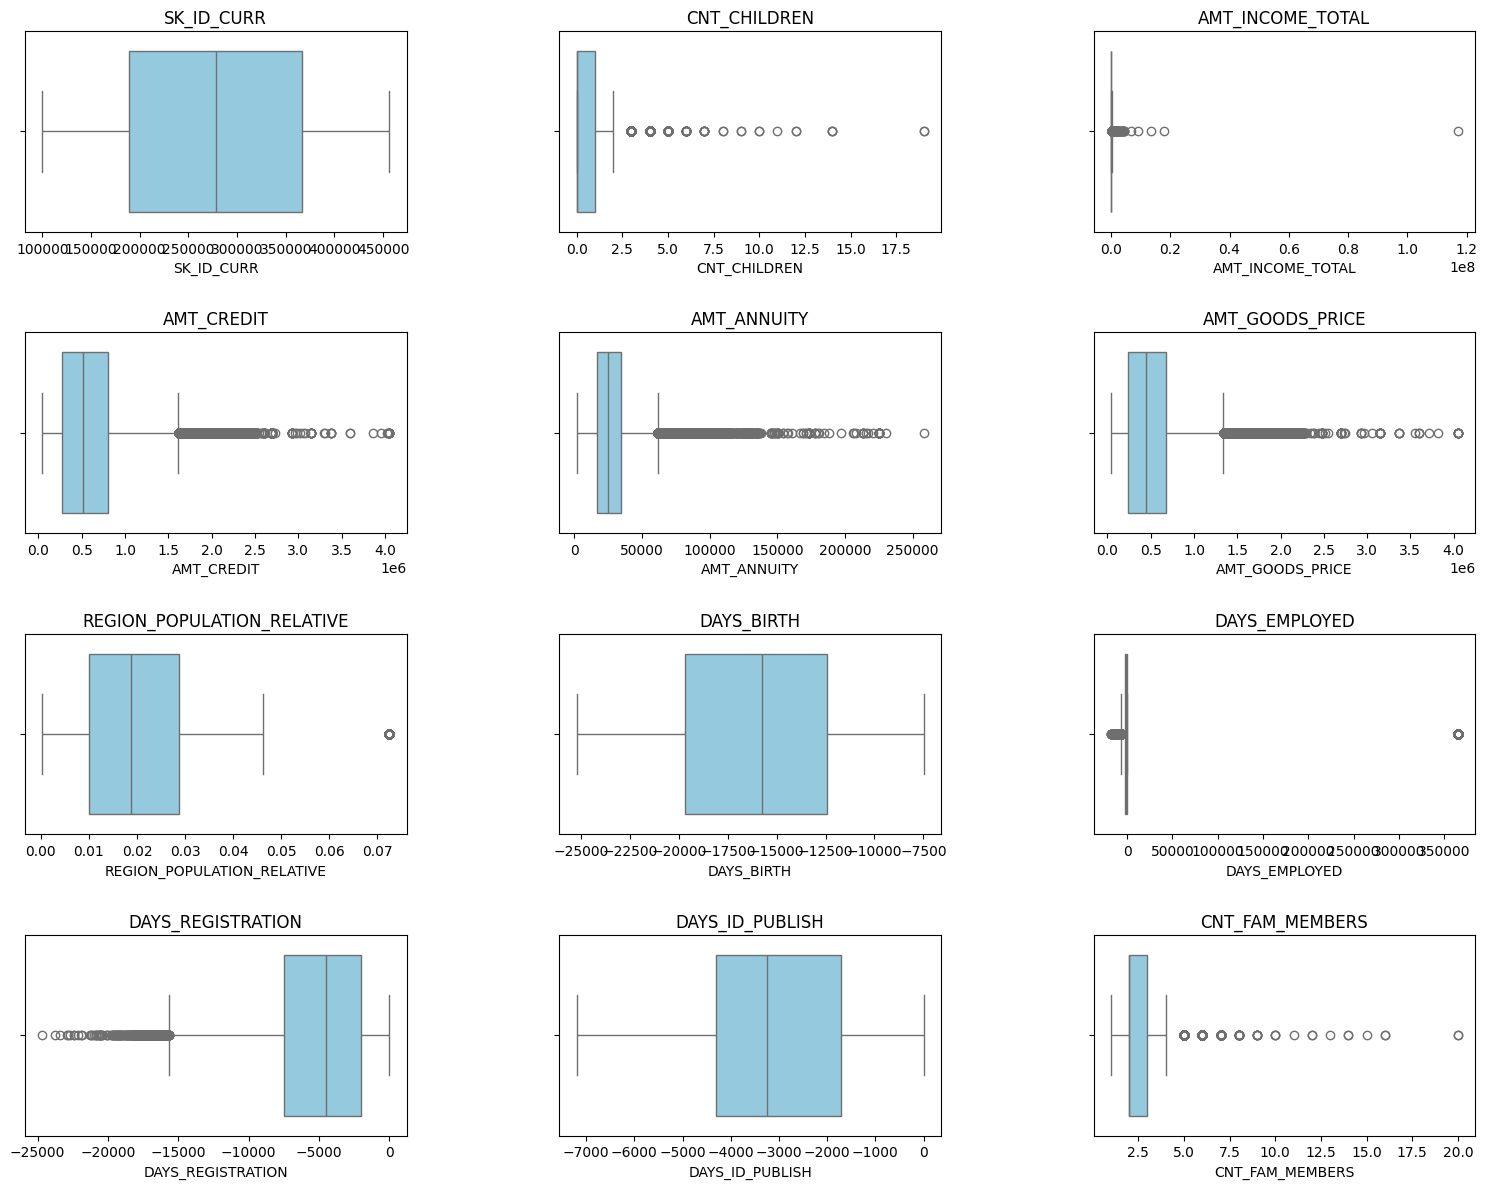

In [23]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols[:12]):
    sns.boxplot(x=train[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

In [42]:
X = train.drop(columns=['TARGET'])
y = train['TARGET']

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)

In [60]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])

In [61]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['SK_ID_CURR', 'CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'CNT_FAM_MEMBERS',
                                                   'HOUR_APPR_PROCESS_START',
                                                   'EXT_SOURCE_1',
                                                   'EXT_SOURCE_2',
                                                   'E...
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    random_state=42))])

In [62]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.5862478253093345

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.58      0.72     56538
           1       0.11      0.61      0.19      4965

    accuracy                           0.59     61503
   macro avg       0.53      0.60      0.46     61503
weighted avg       0.88      0.59      0.68     61503



In [38]:
test_pred_proba = model.predict_proba(test)[:, 1]

In [39]:
submission = pd.DataFrame({
    'SK_ID_CURR': test['SK_ID_CURR'],
    'TARGET': test_pred_proba
})

In [40]:
submission.to_csv("submission.csv", index=False)

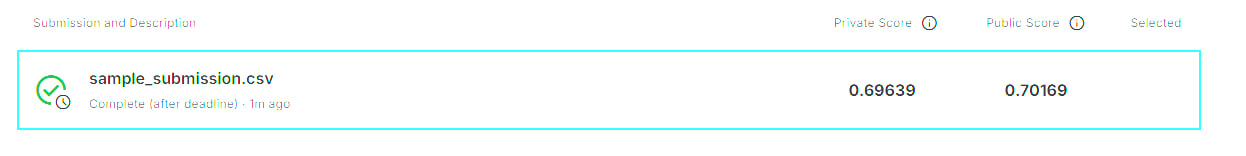